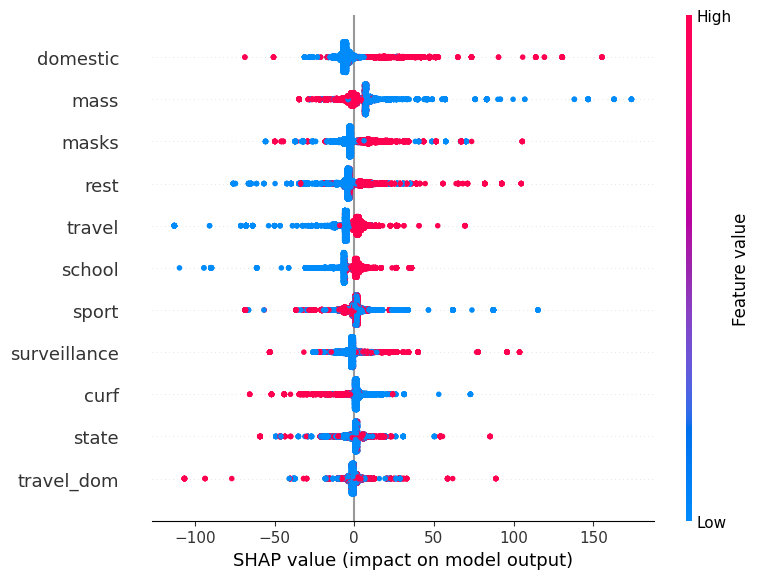

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt

# Load dataset (replace with actual path)
df = pd.read_csv("/content/preprocessed_dataset.csv")

# Define policy-related features
policy_features = [
    'school', 'domestic', 'travel', 'travel_dom',
    'curf',  'mass', 'sport',
    'rest', 'surveillance',  'masks',
    'state'
]

# Set target variable to deaths
target = 'deaths'

# Handle missing values
df = df.dropna(subset=[target])  # Drop rows with missing target values
df[policy_features] = df[policy_features].fillna(0)  # Fill missing policy data with 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[policy_features], df[target], test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# SHAP Analysis for XGBoost
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=policy_features)
plt.show()


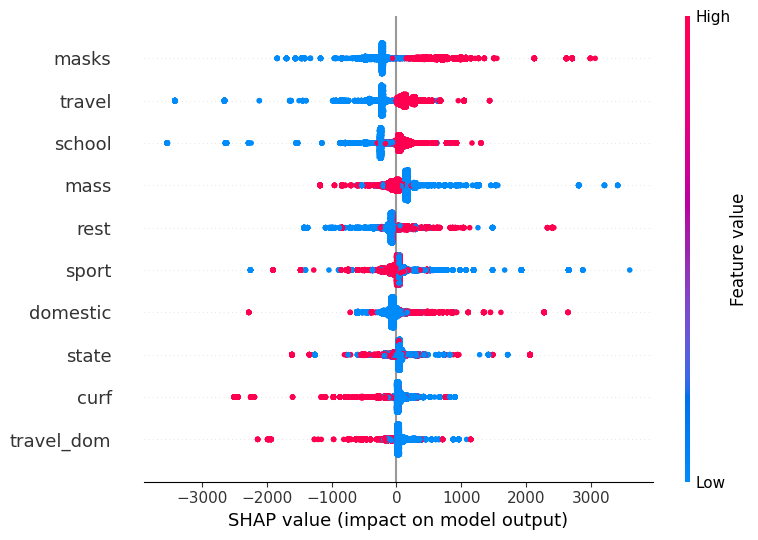

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt

# Load dataset (replace with actual path)
df = pd.read_csv("/content/preprocessed_dataset.csv")

# Define policy-related features
policy_features = [
    'school', 'domestic', 'travel', 'travel_dom',
    'curf',  'mass', 'sport',
    'rest',  'masks',
    'state'
]

# Set target variable to deaths
target = 'cases'

# Handle missing values
df = df.dropna(subset=[target])  # Drop rows with missing target values
df[policy_features] = df[policy_features].fillna(0)  # Fill missing policy data with 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[policy_features], df[target], test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# SHAP Analysis for XGBoost
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=policy_features)
plt.show()
